## Crop Recommendation System using Machine Learning

#### Objective:To build a machine learning model that recommends the most suitable crop for cultivation based on soil and climatic conditions.

### Step 1: Installing required libraries

In [2]:
!pip install numpy pandas matplotlib seaborn scikit-learn

### Step 2: Import Libraries

In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Model and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [5]:
# Save model
import pickle

In [6]:
# Warnings
import warnings
warnings.filterwarnings("ignore")

### Step 3: Load the Dataset

In [7]:
# Load dataset
crop = pd.read_csv(r"C:\Users\ADMIN\Desktop\Crop Recommendation System\Crop_recommendation.csv")

In [8]:
# Show first 5 rows
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### Step 4: Data Understanding

In [9]:
# Dataset shape
print("Shape of Dataset:", crop.shape)

Shape of Dataset: (2200, 8)


In [10]:
# Data types
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
# Null values
print("Missing values:\n", crop.isnull().sum())

Missing values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [12]:
# Duplicate rows
print("Duplicate Rows:", crop.duplicated().sum())

Duplicate Rows: 0


In [13]:
# Descriptive statistics
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Step 5: Exploratory Data Analysis (EDA)

#### Target Variable Distribution

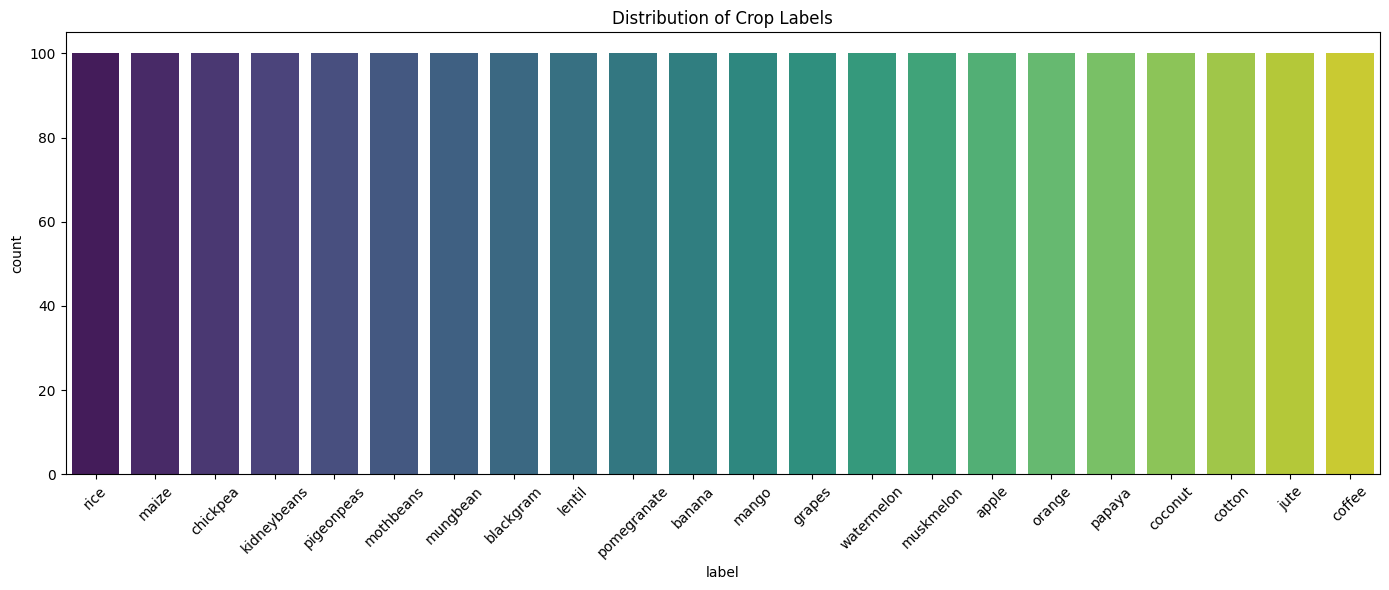

In [14]:
# Crop Distribution
plt.figure(figsize=(14,6))
sns.countplot(data=crop, x='label', order=crop['label'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title("Distribution of Crop Labels")
plt.tight_layout()
plt.show()

#### Correlation Heatmap

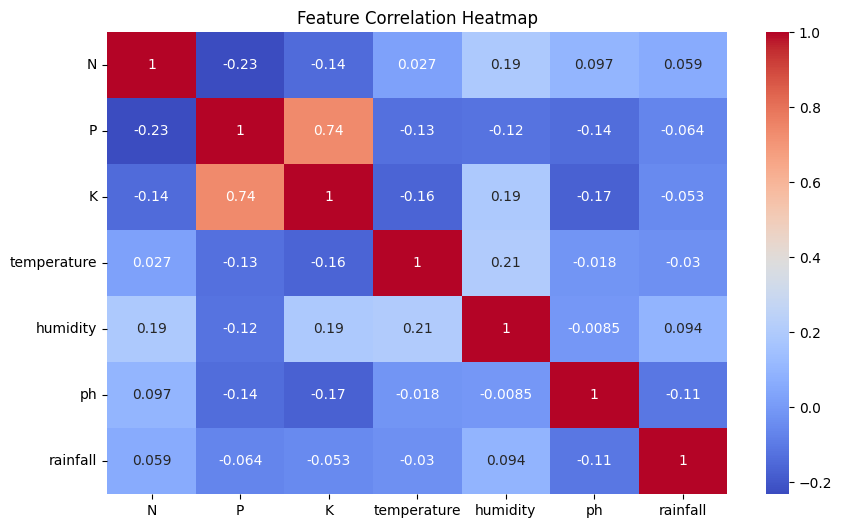

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(crop.drop(['label'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

#### Outlier Detection Using Boxplots

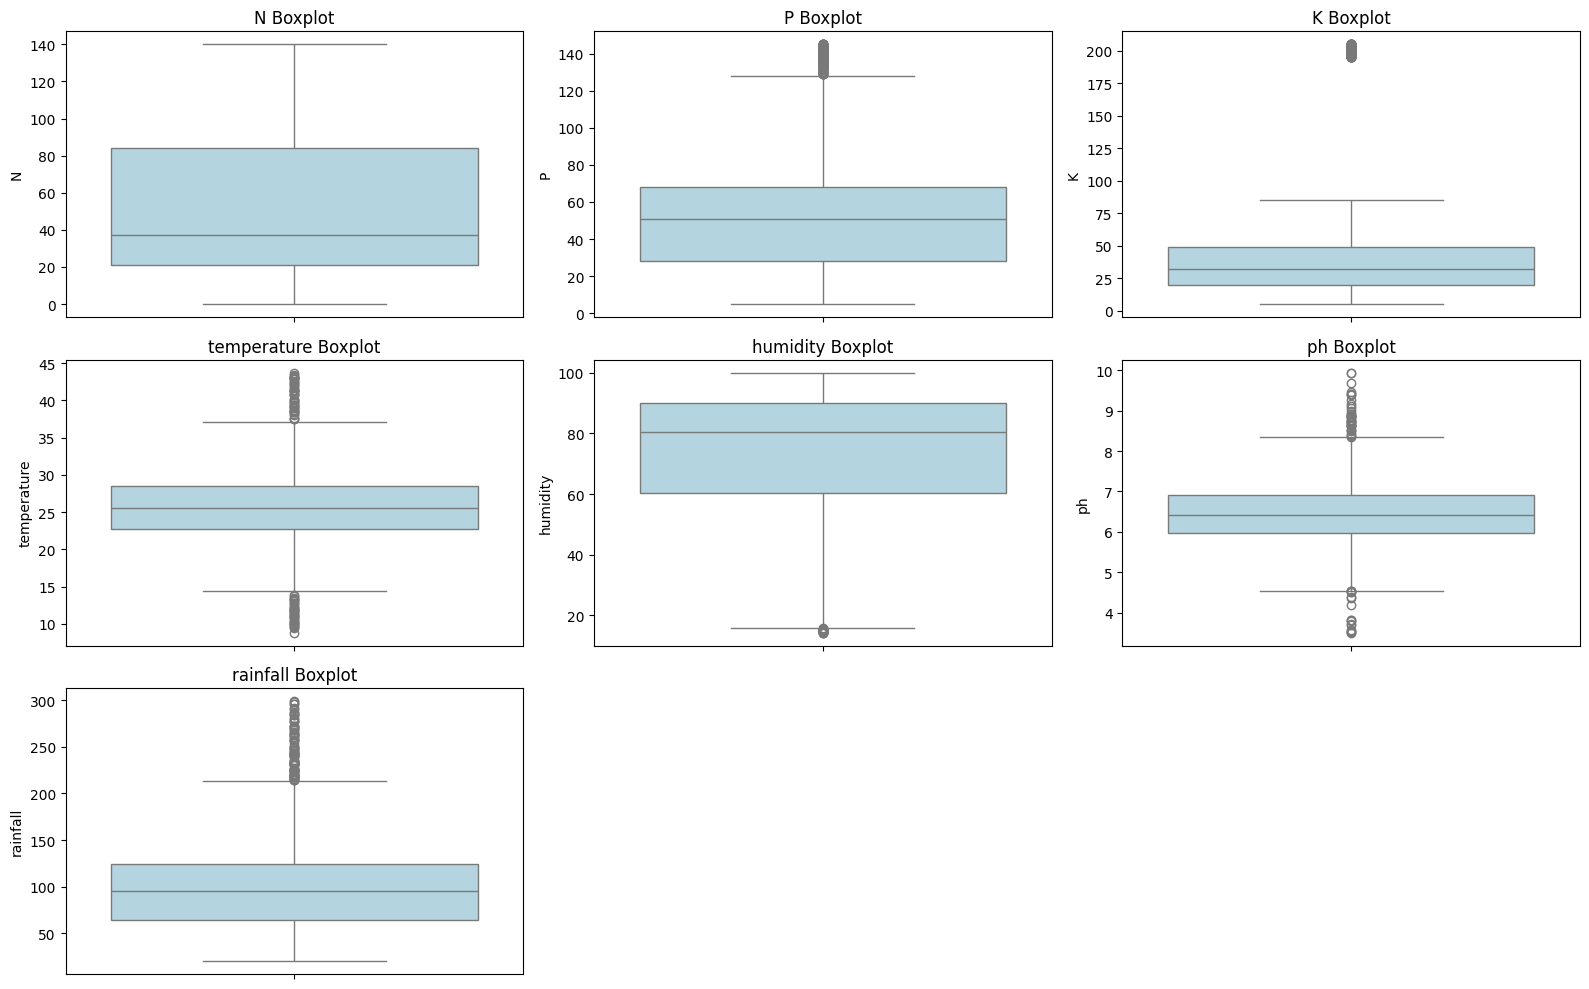

In [16]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
plt.figure(figsize=(16,10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=crop, y=feature, color='lightblue')
    plt.title(f"{feature} Boxplot")
plt.tight_layout()
plt.show()

### Step 6: Encode Target Labels

In [17]:
# Encoding crop labels as numbers
crop_dict = {
    'rice': 1, 'maize': 2, 'jute': 3, 'cotton': 4, 'coconut': 5, 'papaya': 6, 'orange': 7,
    'apple': 8, 'muskmelon': 9, 'watermelon': 10, 'grapes': 11, 'mango': 12, 'banana': 13,
    'pomegranate': 14, 'lentil': 15, 'blackgram': 16, 'mungbean': 17, 'mothbeans': 18,
    'pigeonpeas': 19, 'kidneybeans': 20, 'chickpea': 21, 'coffee': 22
}
crop['crop_num'] = crop['label'].map(crop_dict)

In [18]:
# Drop original label column
crop.drop(['label'], axis=1, inplace=True)

In [19]:
# Final structure
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


### Step 7: Split Features and Target

In [20]:
# Features and Target
X = crop.drop(['crop_num'], axis=1)
y = crop['crop_num']

### Step 8: Train-Test Split

In [21]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 9: Feature Scaling

In [22]:
# Normalize features
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

### Step 10: Model Training and Evaluation

In [23]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

In [24]:
# Model evaluation loop
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("="*60)

Logistic Regression Accuracy: 0.9182
Confusion Matrix:
 [[16  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 23  0 

### Step 11: Final Model Selection

In [25]:
# Random Forest selected
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print("Random Forest Accuracy:", accuracy_score(y_test, rfc.predict(X_test)))

Random Forest Accuracy: 0.9931818181818182


### Step 12: Build Prediction Function

In [27]:
# Crop decoding dictionary
inv_crop_dict = {v: k for k, v in crop_dict.items()}

# Recommendation Function
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    transformed = ms.transform(features)
    pred = rfc.predict(transformed)[0]
    crop_name = inv_crop_dict.get(pred, "Unknown")
    print(f"Recommended Crop: {crop_name}")
    return crop_name

### Step 13: Test Predictions

In [28]:
# Test Case 1
recommendation(40, 50, 50, 40.0, 20.0, 100, 100)

# Test Case 2
recommendation(100, 90, 100, 50.0, 90.0, 100, 202.0)

# Test Case 3
recommendation(10, 10, 10, 15.0, 80.0, 4.5, 10.0)

Recommended Crop: kidneybeans
Recommended Crop: papaya
Recommended Crop: orange


'orange'

### Step 14: Save the Model and Scaler

In [29]:
# Save model and scaler
pickle.dump(rfc, open('model.pkl', 'wb'))
pickle.dump(ms, open('minmaxscaler.pkl', 'wb'))
print("Model and Scaler saved successfully.")

Model and Scaler saved successfully.
